In [1]:
import pandas as pd
import fastkml
import geopy
import shapely
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white') 
%matplotlib inline

/home/rolisz/.local/share/virtualenvs/olx_scrapy-aYPf9owV/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rolisz/.local/share/virtualenvs/olx_scrapy-aYPf9owV/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rolisz/.local/share/virtualenvs/olx_scrapy-aYPf9owV/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1000)
pd.set_option('expand_frame_repr', False)  # more options can be specified also

In [4]:
data = pd.read_csv("annot_houses.csv")
data = data.drop(columns=["type"])
data = data.set_index("Unnamed: 0")

In [53]:
data[data["str inf"] == "strada Clujului"]

,nr_anunt,An constructie,Camere,Locuinta mobilata / utilata,Oferit de,Suprafata utila,date,price,text,title,url,CohortGroup,city inf,str inf,neighb inf
Unnamed: 0,,,,,,,,,,,,,,,
11884,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-02-28,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
12437,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-01,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
13379,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-02,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
14643,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-04,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
15311,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-05,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
16462,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-07,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
17165,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-08,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
18306,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-09,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului
19119,143203341,NaN,3 camere,NaN,Proprietar,140 m²,2018-03-10,55000€,"Casa noua la cheie in cartier Tineretului , zona buna , usor accesibila din strada Clujului la 200 m de asfalt.",Vand Casa la cheie -teren 500mp,https://www.olx.ro/oferta/vand-casa-la-cheie-teren-500mp-ID9GRJj.html,2018-02-28,NaN,strada Clujului,tineretului


In [5]:
addresses = data[data["city inf"].isnull()]["str inf"].unique()[1:]
addresses

array(['strada Izvorului', 'strada Iuliu Maniu', 'str Horea',
       'Calea Aradului', 'strada Avram Iancu', 'Calea Clujului',
       'str Făcliei', 'strada Romanitei', 'str Facliei', 'strada Oasului',
       'str Ady Endre', 'strada Roman Ciorogariu', 'Str Closca',
       'str Mihai Eminescu', 'str Mestesugarilor', 'strada Plantelor',
       'str Gheorghe Doja', 'strada Liszt Ferenc', 'str Caprioarei',
       'strada bartok bela', 'str Hack Halasi Gyula', 'strada Razboieni',
       'str Branului', 'str Closca', 'Strada Traian',
       'str Piatra Craiului', 'Str cramei', 'str Eftimie Murgu',
       'str Elanului', 'Strada artarilor', 'strada Plaiului',
       'str Adevarului', 'str Rovine', 'str Roman Ciorogariu',
       'strada Ion Bogdan', 'strada Gala Galaction',
       'strada Gheorghe Doja', 'strada prislopului', 'str Sarmisegetuza',
       'strada Stupilor', 'Str Caisilor', 'str nojoridului',
       'str Aurel Lazar', 'Str Facliei', 'Strada Clujului',
       'strada tileagdului'

In [6]:
address_coords = {}

In [7]:
k = fastkml.KML()

In [8]:
k.from_string(open("../Cartiere.kml", "rb").read())

In [9]:
len(list(list(list(k.features())[0].features())[0].features()))


27

In [10]:
coder = geopy.geocoders.Nominatim(user_agent="rolisz")

In [11]:
for a in addresses:
    res = coder.geocode(a +" Oradea")
    if res is None:
        print(a)
        continue
    address_coords[a] = shapely.geometry.Point(res.longitude, res.latitude)

strada bartok bela
Strada Traian
str Sarmisegetuza
Strada Clujului
str Paun Pinciu
Str Clujului
strada Veteranilor
strada Corneliu Sdrehus
StradaTuberozelor
strada Clujului
strada Odesei
str Veteranilor
str Stefan cel Mare
str Episcop Ioan Alexi
strada Podgoriei


In [12]:
addres_neighb = {}

In [13]:
for a in address_coords:
    for feat in list(list(list(k.features())[0].features())[0].features()):
        if feat.geometry.contains(address_coords[a]):
            addres_neighb[a] = feat.name.strip()
            break
    else:
        print("not found", a)

not found str Lugojului
not found str Leaganului
not found Calea Santandrei
not found calea santandrei
not found str Ciheiului


In [14]:
addres_neighb["calea santandrei"] = "Calea Santandrei"
addres_neighb["strada Ion Bogdan"] = "Oncea"
addres_neighb["str Matei Corvin"] = "Episcopia"
addres_neighb["str.Matei Corvin"] = "Episcopia"
addres_neighb["str. Leaganului"] = "Olosig"
addres_neighb["strada Matei Corvin"] = "Episcopia"
addres_neighb["Str. Matei Corvin"] = "Episcopia"
addres_neighb["str Ciheiului"] = "Nufarul"
addres_neighb["str. Lugojului"] = "Dorobantilor"
addres_neighb["Calea Santandrei"] = "Calea Santandrei"
addres_neighb["strada bartok bela"] = "Nicolae Iorga"
addres_neighb["Strada Traian"] = "Orasul Nou"
addres_neighb["str Sarmisegetuza"] = "Calea Aradului"
addres_neighb["str.Clujului"] = "Tokai"
addres_neighb["str. Paun Pinciu"] = "Oncea"
addres_neighb["Str. Clujului"] = "Dragos Voda"
addres_neighb["strada Veteranilor"] = "Iosia"
addres_neighb["StradaTuberozelor"] = "Orasul Nou"
addres_neighb["strada Clujului"] = "Tokai"
addres_neighb["str Veteranilor"] = "Iosia"
addres_neighb["str. Stefan cel Mare"] = "Rogerius"
addres_neighb["str. Episcop Ioan Alexi"] = "Episcopia"
addres_neighb["strada Podgoriei"] = "Podgoria"
addres_neighb["str.Jean Sandulescu"] = "Grigorescu"
addres_neighb["strada Corneliu Sdrehus"] = "Grigorescu"

In [15]:
neighb = data["neighb inf"].unique()[1:]
neighb


array(['oncea', 'ultracentral', 'Decebal', 'primariei', 'grigorescu',
       'horea', 'centrala', 'episcopia', 'tineretului', 'Balcescu',
       'muntele găina', 'iosia', 'Calea Clujului', 'semicentrala',
       'nufarul', 'rogerius', 'garii', 'eminescu', 'doja', 'cantemir',
       'horia', 'Doja', 'piata devei', 'decebal', 'velenta',
       'spitalul judetean', 'ioșia', 'dealuri', 'Oncea', 'ultra central',
       'Gheorghe Doja', 'armatei romane', 'Dimitrie Cantemir', 'balcescu',
       'Horea', 'Tineretului', 'splaiul crisanei', 'era', 'gheorghe doja',
       'Cantemir', 'parcului bratianu', 'calea clujului', 'Grigorescu',
       'garii centrale', 'clujului', 'crisan', 'dimitrie cantemir',
       'DECEBAL', 'Nufarul', 'Centrala'], dtype=object)

In [16]:
neighb_map = {'ultracentral': "Orasul Nou", 'primariei': "Orasul Nou", "horea": "Dorobantilor",
              'centrala': "Olosig", 'tineretului': "Velenta", 'muntele găina,': "Dimitrie Cantemir",
       'semicentrala':"Olosig", 'garii': "Rogerius", 'eminescu': "Mihai Eminescu", 'doja': "Gheorghe Doja",
       'cantemir': "Dimitrie Cantemir", 'horia': "Dorobantilor", 'episcopia bihor': "Episcopia",
              'piata devei': "Iosia", 'decebal': "Decebal Dacia", 'spitalul judetean': "Gheorghe Doja",
            'dealuri': "Gheorghe Doja", 'calea clujului': "Tokai", 'ultra central': "Orasul Nou",
              'pieței i. creanga': "Olosig", 'h. ipsen': "Iosia", 'armatei romane': "Dorobantilor", 
              'balcescu': "Calea Santandrei", "Centrala": "Olosig", "Tineretului": "Tokai",
       'bazilicii romano-catolice': "Olosig", 'era': "Calea Santandrei", "Balcescu": "Calea Aradului",
              "Decebal": "Decebal Dacia", "Doja": "Gheorghe Doja", "Cantemir": "Dimitrie Cantemir", 
              "Ioșia": "Iosia", "Muntele Găina": "Dimitrie Cantemir", "Calea Clujului": "Tokai",
              "Horea": "Dorobantilor",
       'parcului bratianu':"Olosig", 'gh. doja': "Gheorghe Doja", 'garii centrale':"Rogerius", 'clujului': "Tokai",
       'bancpost': "Orasul Nou", 'crisan': "Dorobantilor"}

In [17]:
def get_nb(row):
    st = row["str inf"]
    nb = row["neighb inf"]
    neighborhood = ""
    if st in addres_neighb:
        neighborhood = addres_neighb[st]
    if type(nb) == str:
        if nb in neighb_map:
            if neighborhood == neighb_map[nb]:
                return neighborhood
            else:
                return neighb_map[nb]
        if nb.title() in neighb_map:
            return neighb_map[nb.title()]
        if nb.title() == neighborhood:
            return neighborhood
        else:
            return nb.title()
    return neighborhood

In [18]:
data["Neighborhood"] = data.apply(get_nb, axis=1)


In [19]:
def convert_price(prc):
    if prc[-1] == "€":
        return float(prc[:-1])
    elif prc[-3:] == "lei":
        return float(prc[:-3])/4.5
    elif prc == "Schimb":
        return -1
    return prc

In [20]:
data["price"] = data["price"].apply(convert_price)

In [21]:
"DECEBAL".title()

'Decebal'

In [22]:
data[(data["city inf"].isnull()) & ("Neighborhood" != "")].shape

(55843, 16)

In [23]:
nb_data = data[(data["city inf"].isnull()) & (data["Neighborhood"] != "") & (data["price"] > 0)].groupby('text').first()

In [24]:
means = nb_data.groupby("Neighborhood")["price"].mean()

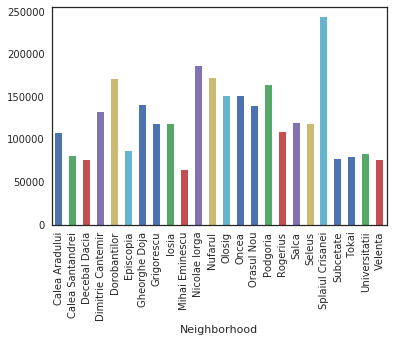

In [25]:
means.plot(kind='bar')

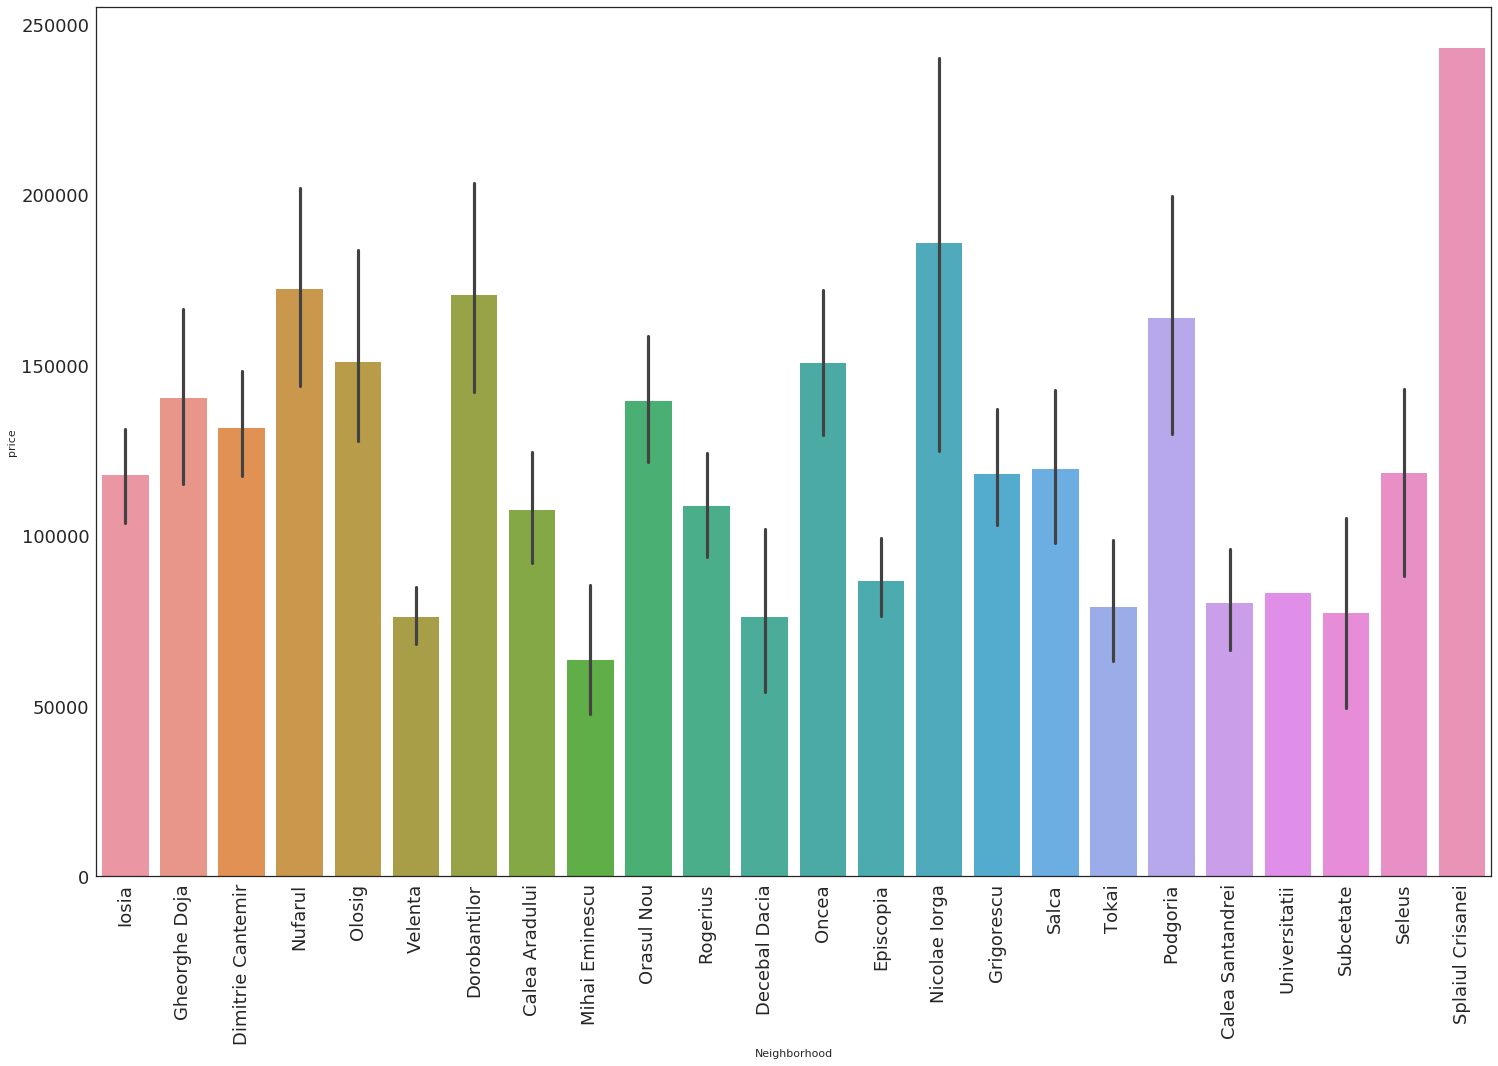

In [33]:
plt.figure(figsize=(25,16))
plot = sns.barplot(data=nb_data, x="Neighborhood", y="price")
for item in plot.get_yticklabels():
    item.set_fontsize(18)
for item in plot.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(18)

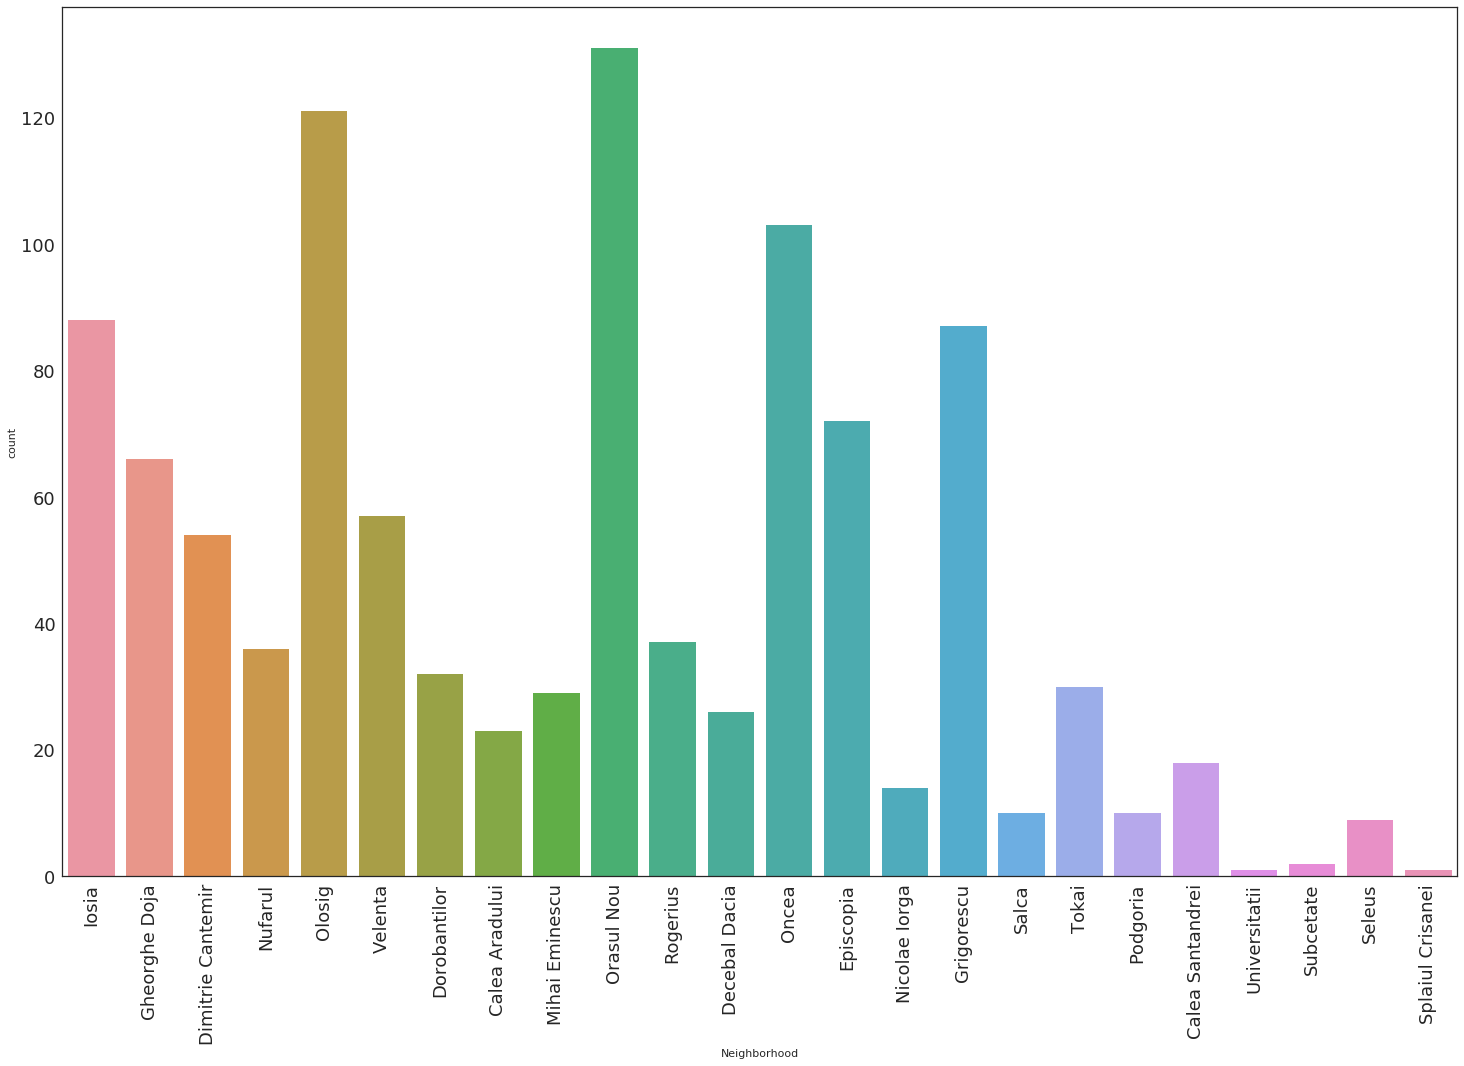

In [34]:
plt.figure(figsize=(25,16))

plot = sns.countplot(data=nb_data, x="Neighborhood")
for item in plot.get_yticklabels():
    item.set_fontsize(18)
for item in plot.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(18)